In [1]:
#Import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
#Import files =9 seperate datasets
data_2015=pd.read_csv('/HCAHPS/HCAHPS2015.csv', encoding = 'unicode_escape',low_memory=False)
data_2016=pd.read_csv('/HCAHPS/HCAHPS2016.csv', encoding = 'unicode_escape',low_memory=False)
data_2017=pd.read_csv('/HCAHPS/HCAHPS2017.csv', encoding = 'unicode_escape',low_memory=False)
data_2018=pd.read_csv('/HCAHPS/HCAHPS2018.csv', encoding = 'unicode_escape',low_memory=False)
data_2019=pd.read_csv('/HCAHPS/HCAHPS2019.csv', encoding = 'unicode_escape',low_memory=False)
data_2020=pd.read_csv('/HCAHPS/HCAHPS2020.csv', encoding = 'unicode_escape',low_memory=False)
data_2021=pd.read_csv('/HCAHPS/HCAHPS2021.csv', encoding = 'unicode_escape',low_memory=False)
data_2022=pd.read_csv('/HCAHPS/HCAHPS2022.csv', encoding = 'unicode_escape',low_memory=False)
data_2023=pd.read_csv('/HCAHPS/HCAHPS2023.csv', encoding = 'unicode_escape',low_memory=False)

In [3]:
data_2019.head(5)

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Start Date,End Date
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...","Nurses ""always"" communicated well",Not Applicable,NaN,74,NaN,Not Applicable,558,NaN,23,NaN,01/01/2018,12/31/2018
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...","Nurses ""sometimes"" or ""never"" communicated well",Not Applicable,NaN,8,NaN,Not Applicable,558,NaN,23,NaN,01/01/2018,12/31/2018
2,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...","Nurses ""usually"" communicated well",Not Applicable,NaN,18,NaN,Not Applicable,558,NaN,23,NaN,01/01/2018,12/31/2018
3,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,Nurse communication - linear mean score,Not Applicable,NaN,Not Applicable,NaN,88,558,NaN,23,NaN,01/01/2018,12/31/2018
4,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_STAR_RATING,Nurse communication - star rating,Nurse communication - star rating,2,NaN,Not Applicable,NaN,Not Applicable,558,NaN,23,NaN,01/01/2018,12/31/2018


In [4]:
data_2015.head(5)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,Summary star rating,3,NaN,Not Applicable,NaN,Not Applicable,1313,NaN,27,NaN,04/01/2014,03/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,"Room was ""always"" clean",Not Applicable,NaN,66,NaN,Not Applicable,1313,NaN,27,NaN,04/01/2014,03/31/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,"Room was ""sometimes"" or ""never"" clean",Not Applicable,NaN,12,NaN,Not Applicable,1313,NaN,27,NaN,04/01/2014,03/31/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_U_P,Patients who reported that their room and bath...,"Room was ""usually"" clean",Not Applicable,NaN,22,NaN,Not Applicable,1313,NaN,27,NaN,04/01/2014,03/31/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,Cleanliness - linear mean score,Not Applicable,NaN,Not Applicable,NaN,84,1313,NaN,27,NaN,04/01/2014,03/31/2015


In [5]:
#Step 2: Check column names in data frames
#Display column names for each dataframe
print("/033 [1m" + '2015 Data Types' + "/033[0m")
print (data_2015.columns)
 
print("/033 [1m" + '2016 Data Types' + "/033[0m")
print (data_2016.columns)

print("/033 [1m" + '2017 Data Types' + "/033[0m")
print (data_2017.columns)
 
print("/033 [1m" + '2018 Data Types' + "/033[0m")
print (data_2018.columns)
 
print("/033 [1m" + '2019 Data Types' + "/033[0m")
print (data_2019.columns)

print("/033 [1m" + '2020 Data Types' + "/033[0m")
print (data_2020.columns)
 
print("/033 [1m" + '2021 Data Types' + "/033[0m")
print (data_2021.columns)
 
print("/033 [1m" + '2022 Data Types' + "/033[0m")
print (data_2022.columns)

print("/033 [1m" + '2023 Data Types' + "/033[0m")
print (data_2023.columns) 

/033 2015 Data Types/033
Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'HCAHPS Measure ID', 'HCAHPS Question',
       'HCAHPS Answer Description', 'Patient Survey Star Rating',
       'Patient Survey Star Rating Footnote', 'HCAHPS Answer Percent',
       'HCAHPS Answer Percent Footnote', 'HCAHPS Linear Mean Value',
       'Number of Completed Surveys', 'Number of Completed Surveys Footnote',
       'Survey Response Rate Percent', 'Survey Response Rate Percent Footnote',
       'Measure Start Date', 'Measure End Date'],
      dtype='object')
/033 2016 Data Types/033
Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'HCAHPS Measure ID', 'HCAHPS Question',
       'HCAHPS Answer Description', 'Patient Survey Star Rating',
       'Patient Survey Star Rating Footnote', 'HCAHPS Answer Percent',
       'HCAHPS Answer Percent Footnote', 'HCAHPS Linear Mean Va

In [6]:
#step 3 select spesific columns

#2015
Data2015_filtered=pd.DataFrame(data_2015, columns =['Provider ID','Hospital Name','HCAHPS Measure ID',
'HCAHPS Linear Mean Value','Measure Start Date','Measure End Date'])


#2016
Data2016_filtered=pd.DataFrame(data_2016, columns =['Provider ID','Hospital Name','HCAHPS Measure ID',
'HCAHPS Linear Mean Value','Measure Start Date','Measure End Date'])

#2017
Data2017_filtered=pd.DataFrame(data_2017, columns =['Provider ID','Hospital Name','HCAHPS Measure ID',
'HCAHPS Linear Mean Value','Measure Start Date','Measure End Date'])

#2018
Data2018_filtered=pd.DataFrame(data_2018, columns =['Provider ID','Hospital Name','HCAHPS Measure ID',
'HCAHPS Linear Mean Value','Measure Start Date','Measure End Date'])

#2019
Data2019_filtered=pd.DataFrame(data_2019, columns =['Facility ID','Facility Name','HCAHPS Measure ID',
'HCAHPS Linear Mean Value','Measure Start Date','Measure End Date'])

#2020
Data2020_filtered=pd.DataFrame(data_2020, columns =['Facility ID','Facility Name','HCAHPS Measure ID',
'HCAHPS Linear Mean Value','Measure Start Date','Measure End Date'])

#2021
Data2021_filtered=pd.DataFrame(data_2021, columns =['Facility ID','Facility Name','HCAHPS Measure ID',
'HCAHPS Linear Mean Value','Measure Start Date','Measure End Date'])

#2022
Data2022_filtered=pd.DataFrame(data_2022, columns =['Facility ID','Facility Name','HCAHPS Measure ID',
'HCAHPS Linear Mean Value','Measure Start Date','Measure End Date'])

#2023
Data2023_filtered=pd.DataFrame(data_2023, columns =['Facility ID','Facility Name','HCAHPS Measure ID',
'HCAHPS Linear Mean Value','Measure Start Date','Measure End Date'])

In [7]:
#Select Discharge information Measure ID = H_COMP_6_LINEAR_SCORE 
Data2015_filtered=Data2015_filtered[Data2015_filtered['HCAHPS Measure ID'].isin(['H_COMP_1_LINEAR_SCORE'])]
Data2016_filtered=Data2016_filtered[Data2016_filtered['HCAHPS Measure ID'].isin(['H_COMP_1_LINEAR_SCORE'])]
Data2017_filtered=Data2017_filtered[Data2017_filtered['HCAHPS Measure ID'].isin(['H_COMP_1_LINEAR_SCORE'])]
Data2018_filtered=Data2018_filtered[Data2018_filtered['HCAHPS Measure ID'].isin(['H_COMP_1_LINEAR_SCORE'])]
Data2019_filtered=Data2019_filtered[Data2019_filtered['HCAHPS Measure ID'].isin(['H_COMP_1_LINEAR_SCORE'])]
Data2020_filtered=Data2020_filtered[Data2020_filtered['HCAHPS Measure ID'].isin(['H_COMP_1_LINEAR_SCORE'])]
Data2021_filtered=Data2021_filtered[Data2021_filtered['HCAHPS Measure ID'].isin(['H_COMP_1_LINEAR_SCORE'])]
Data2022_filtered=Data2022_filtered[Data2022_filtered['HCAHPS Measure ID'].isin(['H_COMP_1_LINEAR_SCORE'])]
Data2023_filtered=Data2023_filtered[Data2023_filtered['HCAHPS Measure ID'].isin(['H_COMP_1_LINEAR_SCORE'])]

In [8]:
#Veiw the filterd data
Data2020_filtered

,Facility ID,Facility Name,HCAHPS Measure ID,HCAHPS Linear Mean Value,Measure Start Date,Measure End Date
3,010001,SOUTHEAST ALABAMA MEDICAL CENTER,H_COMP_1_LINEAR_SCORE,90,NaN,NaN
96,010005,MARSHALL MEDICAL CENTERS,H_COMP_1_LINEAR_SCORE,91,NaN,NaN
189,010006,NORTH ALABAMA MEDICAL CENTER,H_COMP_1_LINEAR_SCORE,90,NaN,NaN
282,010007,MIZELL MEMORIAL HOSPITAL,H_COMP_1_LINEAR_SCORE,91,NaN,NaN
375,010008,CRENSHAW COMMUNITY HOSPITAL,H_COMP_1_LINEAR_SCORE,Not Available,NaN,NaN
...,...,...,...,...,...,...
453192,670128,BAYLOR SCOTT & WHITE MEDICAL CENTER PFLUGERVILLE,H_COMP_1_LINEAR_SCORE,Not Available,NaN,NaN
453285,670129,THE HEIGHTS HOSPITAL,H_COMP_1_LINEAR_SCORE,Not Available,NaN,NaN
453378,670130,SOUTHCROSS HOSPITAL,H_COMP_1_LINEAR_SCORE,Not Available,NaN,NaN
453471,670131,BAYLOR SCOTT & WHITE MEDICAL CENTER BUDA,H_COMP_1_LINEAR_SCORE,Not Available,NaN,NaN


In [9]:
#Stpe 4 : explore Data 
print("/033 [1m" + '2015 Data Types' + "/033[0m")
print (Data2015_filtered.columns)
 
print("/033 [1m" + '2016 Data Types' + "/033[0m")
print (Data2016_filtered.columns)

print("/033 [1m" + '2017 Data Types' + "/033[0m")
print (Data2017_filtered.columns)
 
print("/033 [1m" + '2018 Data Types' + "/033[0m")
print (Data2018_filtered.columns)
 
print("/033 [1m" + '2019 Data Types' + "/033[0m")
print (Data2019_filtered.columns)

print("/033 [1m" + '2020 Data Types' + "/033[0m")
print (Data2020_filtered.columns)
 
print("/033 [1m" + '2021 Data Types' + "/033[0m")
print (Data2021_filtered.columns)
 
print("/033 [1m" + '2022 Data Types' + "/033[0m")
print (Data2022_filtered.columns)

print("/033 [1m" + '2023 Data Types' + "/033[0m")
print (Data2023_filtered.columns)

/033 2015 Data Types/033
Index(['Provider ID', 'Hospital Name', 'HCAHPS Measure ID',
       'HCAHPS Linear Mean Value', 'Measure Start Date', 'Measure End Date'],
      dtype='object')
/033 2016 Data Types/033
Index(['Provider ID', 'Hospital Name', 'HCAHPS Measure ID',
       'HCAHPS Linear Mean Value', 'Measure Start Date', 'Measure End Date'],
      dtype='object')
/033 2017 Data Types/033
Index(['Provider ID', 'Hospital Name', 'HCAHPS Measure ID',
       'HCAHPS Linear Mean Value', 'Measure Start Date', 'Measure End Date'],
      dtype='object')
/033 2018 Data Types/033
Index(['Provider ID', 'Hospital Name', 'HCAHPS Measure ID',
       'HCAHPS Linear Mean Value', 'Measure Start Date', 'Measure End Date'],
      dtype='object')
/033 2019 Data Types/033
Index(['Facility ID', 'Facility Name', 'HCAHPS Measure ID',
       'HCAHPS Linear Mean Value', 'Measure Start Date', 'Measure End Date'],
      dtype='object')
/033 2020 Data Types/033
Index(['Facility ID', 'Facility Name', 'HCAHPS Mea

In [10]:
#Stpe 4s : explore Data type
print("/033 [1m" + '2015 Data Types' + "/033[0m")
print (Data2015_filtered.dtypes)
 
print("/033 [1m" + '2016 Data Types' + "/033[0m")
print (Data2016_filtered.dtypes)

print("/033 [1m" + '2017 Data Types' + "/033[0m")
print (Data2017_filtered.dtypes)
 
print("/033 [1m" + '2018 Data Types' + "/033[0m")
print (Data2018_filtered.dtypes)
 
print("/033 [1m" + '2019 Data Types' + "/033[0m")
print (Data2019_filtered.dtypes)

print("/033 [1m" + '2020 Data Types' + "/033[0m")
print (Data2020_filtered.dtypes)
 
print("/033 [1m" + '2021 Data Types' + "/033[0m")
print (Data2021_filtered.dtypes)
 
print("/033 [1m" + '2022 Data Types' + "/033[0m")
print (Data2022_filtered.dtypes)

print("/033 [1m" + '2023 Data Types' + "/033[0m")
print (Data2023_filtered.dtypes) 

/033 2015 Data Types/033
Provider ID                  int64
Hospital Name               object
HCAHPS Measure ID           object
HCAHPS Linear Mean Value    object
Measure Start Date          object
Measure End Date            object
dtype: object
/033 2016 Data Types/033
Provider ID                  int64
Hospital Name               object
HCAHPS Measure ID           object
HCAHPS Linear Mean Value    object
Measure Start Date          object
Measure End Date            object
dtype: object
/033 2017 Data Types/033
Provider ID                  int64
Hospital Name               object
HCAHPS Measure ID           object
HCAHPS Linear Mean Value    object
Measure Start Date          object
Measure End Date            object
dtype: object
/033 2018 Data Types/033
Provider ID                 object
Hospital Name               object
HCAHPS Measure ID           object
HCAHPS Linear Mean Value    object
Measure Start Date          object
Measure End Date            object
dtype: object
/033

In [11]:
#Step 6: Replacing ‘Not Available’ entry
# Replace "Not Available"


Data2015_filtered ['HCAHPS Linear Mean Value']=pd.to_numeric(Data2015_filtered['HCAHPS Linear Mean Value'],errors= 'coerce')
Data2015_filtered = Data2015_filtered.replace(np.nan,0, regex =True )


Data2016_filtered ['HCAHPS Linear Mean Value']=pd.to_numeric(Data2016_filtered['HCAHPS Linear Mean Value'],errors= 'coerce')
Data2016_filtered = Data2016_filtered.replace(np.nan,0, regex =True )


Data2017_filtered ['HCAHPS Linear Mean Value']=pd.to_numeric(Data2017_filtered['HCAHPS Linear Mean Value'],errors= 'coerce')
Data2017_filtered = Data2017_filtered.replace(np.nan,0, regex =True )


Data2018_filtered ['HCAHPS Linear Mean Value']=pd.to_numeric(Data2018_filtered['HCAHPS Linear Mean Value'],errors= 'coerce')
Data2018_filtered = Data2018_filtered.replace(np.nan,0, regex =True )


Data2019_filtered ['HCAHPS Linear Mean Value']=pd.to_numeric(Data2019_filtered['HCAHPS Linear Mean Value'],errors= 'coerce')
Data2019_filtered = Data2019_filtered.replace(np.nan,0, regex =True )


Data2020_filtered ['HCAHPS Linear Mean Value']=pd.to_numeric(Data2020_filtered['HCAHPS Linear Mean Value'],errors= 'coerce')
Data2020_filtered = Data2020_filtered.replace(np.nan,0, regex =True )


Data2021_filtered ['HCAHPS Linear Mean Value']=pd.to_numeric(Data2021_filtered['HCAHPS Linear Mean Value'],errors= 'coerce')
Data2021_filtered = Data2021_filtered.replace(np.nan,0, regex =True )


Data2022_filtered ['HCAHPS Linear Mean Value']=pd.to_numeric(Data2022_filtered['HCAHPS Linear Mean Value'],errors= 'coerce')
Data2022_filtered = Data2022_filtered.replace(np.nan,0, regex =True )


Data2023_filtered ['HCAHPS Linear Mean Value']=pd.to_numeric(Data2023_filtered['HCAHPS Linear Mean Value'],errors= 'coerce')
Data2023_filtered = Data2023_filtered.replace(np.nan,0, regex =True )

In [12]:
##Step 6a: View updated column


print ("/033[1m"+ '2015 HCAHPS Linear Mean Value float Types' +"/033[0m" )
print (Data2015_filtered['HCAHPS Linear Mean Value'].head(10))

print ("/033[1m"+ '2016 HCAHPS Linear Mean Value float Types' +"/033[0m" )
print (Data2016_filtered['HCAHPS Linear Mean Value'].head(10))

print ("/033[1m"+ '2017 HCAHPS Linear Mean Value float Types' +"/033[0m" )
print (Data2017_filtered['HCAHPS Linear Mean Value'].head(10))

print ("/033[1m"+ '2018 HCAHPS Linear Mean Value float Types'+"/033[0m" )
print (Data2018_filtered['HCAHPS Linear Mean Value'].head(10))

print ("/033[1m"+ '2019 HCAHPS Linear Mean Value float Types' +"/033[0m" )
print (Data2019_filtered['HCAHPS Linear Mean Value'].head(10))

print ("/033[1m"+ '2020 HCAHPS Linear Mean Value float Types' +"/033[0m" )
print (Data2020_filtered['HCAHPS Linear Mean Value'].head(10))

print ("/033[1m"+ '2021 HCAHPS Linear Mean Value float Types' +"/033[0m" )
print (Data2021_filtered['HCAHPS Linear Mean Value'].head(10))

print ("/033[1m"+ '2022 HCAHPS Linear Mean Value float Types' +"/033[0m" )
print (Data2022_filtered['HCAHPS Linear Mean Value'].head(10))

print ("/033[1m"+ '2023 HCAHPS Linear Mean Value float Types' +"/033[0m" )
print (Data2023_filtered['HCAHPS Linear Mean Value'].head(10))

/0332015 HCAHPS Linear Mean Value float Types/033
7      89.0
62     93.0
117    93.0
172    89.0
227     0.0
282    90.0
337    92.0
392    90.0
447     0.0
502    91.0
Name: HCAHPS Linear Mean Value, dtype: float64
/0332016 HCAHPS Linear Mean Value float Types/033
7      90.0
62     91.0
117    91.0
172    91.0
227     0.0
282    89.0
337    92.0
392    89.0
447     0.0
502    90.0
Name: HCAHPS Linear Mean Value, dtype: float64
/0332017 HCAHPS Linear Mean Value float Types/033
7      89.0
62     92.0
117    91.0
172    91.0
227     0.0
282    90.0
337    92.0
392    90.0
447     0.0
502    92.0
Name: HCAHPS Linear Mean Value, dtype: float64
/0332018 HCAHPS Linear Mean Value float Types/033
7      88.0
57     91.0
107    90.0
157    89.0
207     0.0
257    90.0
307    89.0
357    89.0
407     0.0
457    93.0
Name: HCAHPS Linear Mean Value, dtype: float64
/0332019 HCAHPS Linear Mean Value float Types/033
3      88.0
96     92.0
189    88.0
282    90.0
375     0.0
468    89.0
561    89.

In [13]:
Data2020_filtered.head(5)

,Facility ID,Facility Name,HCAHPS Measure ID,HCAHPS Linear Mean Value,Measure Start Date,Measure End Date
3,010001,SOUTHEAST ALABAMA MEDICAL CENTER,H_COMP_1_LINEAR_SCORE,90.0,0.0,0.0
96,010005,MARSHALL MEDICAL CENTERS,H_COMP_1_LINEAR_SCORE,91.0,0.0,0.0
189,010006,NORTH ALABAMA MEDICAL CENTER,H_COMP_1_LINEAR_SCORE,90.0,0.0,0.0
282,010007,MIZELL MEMORIAL HOSPITAL,H_COMP_1_LINEAR_SCORE,91.0,0.0,0.0
375,010008,CRENSHAW COMMUNITY HOSPITAL,H_COMP_1_LINEAR_SCORE,0.0,0.0,0.0


In [14]:
##Step 7: Apply conditions to data frame
##CEDARS-SINAI MEDICAL CENTER, LOS ANGELES (50625)
#CLEVELAND CLINIC (100289)
#UCLA MEDICAL CENTER, LOS ANGELES (50262)
#NEW YORK-PRESBYTERIAN HOSPITAL NEW YORK. (330101)
#MASSACHUSETTS GENERAL HOSPITAL, BOSTON (220071)
#JOHNS HOPKINS HOSPITAL(210009)

pids = ['210009','50625','100289','50262','330101','220071']

Data2015_filtered2 = pd.DataFrame(Data2015_filtered[(Data2015_filtered['Provider ID'].isin(pids))])
print("\033[1m" +'2015 Filtered Dataset' + "\033[0m")
print(Data2015_filtered2.head(3))

Data2016_filtered2 = pd.DataFrame(Data2016_filtered[(Data2016_filtered['Provider ID'].isin(pids))])
print("\033[1m" +'2016 Filtered Dataset' + "\033[0m")
print(Data2016_filtered2.head(3))

Data2017_filtered2 = pd.DataFrame(Data2017_filtered[(Data2017_filtered['Provider ID'].isin(pids))])
print("\033[1m" +'2017 Filtered Dataset' + "\033[0m")
print(Data2017_filtered2.head(3))
      
Data2018_filtered2 = pd.DataFrame(Data2018_filtered[(Data2018_filtered['Provider ID'].isin(pids))])
print("\033[1m" +'2018 Filtered Dataset' + "\033[0m")
print(Data2018_filtered2.head(3))

Data2019_filtered2 = pd.DataFrame(Data2019_filtered[(Data2019_filtered['Facility ID'].isin(pids))])
print("\033[1m" +'2019 Filtered Dataset' + "\033[0m")
print(Data2019_filtered2.head(3))

Data2020_filtered2 = pd.DataFrame(Data2020_filtered[(Data2020_filtered['Facility ID'].isin(pids))])
print("\033[1m" +'2020 Filtered Dataset' + "\033[0m")
print(Data2020_filtered2.head(3))

Data2021_filtered2 = pd.DataFrame(Data2021_filtered[(Data2021_filtered['Facility ID'].isin(pids))])
print("\033[1m" +'2021 Filtered Dataset' + "\033[0m")
print(Data2021_filtered2.head(3))

Data2022_filtered2 = pd.DataFrame(Data2022_filtered[(Data2022_filtered['Facility ID'].isin(pids))])
print("\033[1m" +'2022 Filtered Dataset' + "\033[0m")
print(Data2022_filtered2.head(3))

Data2023_filtered2 = pd.DataFrame(Data2023_filtered[(Data2023_filtered['Facility ID'].isin(pids))])
print("\033[1m" +'2023 Filtered Dataset' + "\033[0m")
print(Data2023_filtered2.head(3))

2015 Filtered Dataset
Empty DataFrame
Columns: [Provider ID, Hospital Name, HCAHPS Measure ID, HCAHPS Linear Mean Value, Measure Start Date, Measure End Date]
Index: []
2016 Filtered Dataset
Empty DataFrame
Columns: [Provider ID, Hospital Name, HCAHPS Measure ID, HCAHPS Linear Mean Value, Measure Start Date, Measure End Date]
Index: []
2017 Filtered Dataset
Empty DataFrame
Columns: [Provider ID, Hospital Name, HCAHPS Measure ID, HCAHPS Linear Mean Value, Measure Start Date, Measure End Date]
Index: []
2018 Filtered Dataset
      Provider ID                   Hospital Name      HCAHPS Measure ID  \
44107      100289       CLEVELAND CLINIC HOSPITAL  H_COMP_1_LINEAR_SCORE   
95807      210009     JOHNS HOPKINS HOSPITAL, THE  H_COMP_1_LINEAR_SCORE   
99307      220071  MASSACHUSETTS GENERAL HOSPITAL  H_COMP_1_LINEAR_SCORE   

       HCAHPS Linear Mean Value Measure Start Date Measure End Date  
44107                      92.0         01/01/2017       12/31/2017  
95807                     

In [15]:
#Step 7: Determine number of rows and columns
#Print of rows and columns

print(Data2015_filtered2.shape)
print(Data2016_filtered2.shape)
print(Data2017_filtered2.shape)
print(Data2018_filtered2.shape)
print(Data2019_filtered2.shape)
print(Data2020_filtered2.shape)
print(Data2021_filtered2.shape)
print(Data2022_filtered2.shape)
print(Data2023_filtered2.shape)

(0, 6)
(0, 6)
(0, 6)
(4, 6)
(4, 6)
(4, 6)
(4, 6)
(4, 6)
(4, 6)


In [16]:
##Step 8: Average Satisfaction at JOHNS HOPKINS HOSPITAL
#Calculate average satisfaction at JH Hosp across all time periods
hosp = ['210009']


Data2015_JH = pd.DataFrame(Data2015_filtered2[(Data2015_filtered2['Provider ID'].isin(hosp))])
avgsatis_JH_2015 = Data2015_JH['HCAHPS Linear Mean Value'].mean()

Data2016_JH = pd.DataFrame(Data2016_filtered2[(Data2016_filtered2['Provider ID'].isin(hosp))])
avgsatis_JH_2016 = Data2016_JH['HCAHPS Linear Mean Value'].mean()

Data2017_JH = pd.DataFrame(Data2017_filtered2[(Data2017_filtered2['Provider ID'].isin(hosp))])
avgsatis_JH_2017 = Data2017_JH['HCAHPS Linear Mean Value'].mean()

Data2018_JH = pd.DataFrame(Data2018_filtered2[(Data2018_filtered2['Provider ID'].isin(hosp))])
avgsatis_JH_2018 = Data2018_JH['HCAHPS Linear Mean Value'].mean()

Data2019_JH = pd.DataFrame(Data2019_filtered2[(Data2019_filtered2['Facility ID'].isin(hosp))])
avgsatis_JH_2019 = Data2019_JH['HCAHPS Linear Mean Value'].mean()

Data2020_JH = pd.DataFrame(Data2020_filtered2[(Data2020_filtered2['Facility ID'].isin(hosp))])
avgsatis_JH_2020 = Data2020_JH['HCAHPS Linear Mean Value'].mean()

Data2021_JH = pd.DataFrame(Data2021_filtered2[(Data2021_filtered2['Facility ID'].isin(hosp))])
avgsatis_JH_2021 = Data2021_JH['HCAHPS Linear Mean Value'].mean()

Data2022_JH = pd.DataFrame(Data2022_filtered2[(Data2022_filtered2['Facility ID'].isin(hosp))])
avgsatis_JH_2022 = Data2022_JH['HCAHPS Linear Mean Value'].mean()

Data2023_JH = pd.DataFrame(Data2023_filtered2[(Data2023_filtered2['Facility ID'].isin(hosp))])
avgsatis_JH_2023 = Data2023_JH['HCAHPS Linear Mean Value'].mean()

print(avgsatis_JH_2015)
print(avgsatis_JH_2016)
print(avgsatis_JH_2017)
print(avgsatis_JH_2018)
print(avgsatis_JH_2019)
print(avgsatis_JH_2020)
print(avgsatis_JH_2021)
print(avgsatis_JH_2022)
print(avgsatis_JH_2023)

nan
nan
nan
92.0
93.0
93.0
92.0
93.0
93.0


In [17]:
##Step 9: Average Satisfaction in other US Hospitals

Data2015_US = pd.DataFrame(Data2015_filtered2[(Data2015_filtered2['Provider ID'] !='210009')])
avgsatis_US_2015 = Data2015_US['HCAHPS Linear Mean Value'].mean()

Data2016_US = pd.DataFrame(Data2016_filtered2[(Data2016_filtered2['Provider ID'] !='210009')])
avgsatis_US_2016 = Data2016_US['HCAHPS Linear Mean Value'].mean()

Data2017_US = pd.DataFrame(Data2017_filtered2[(Data2017_filtered2['Provider ID'] !='210009')])
avgsatis_US_2017 = Data2017_US['HCAHPS Linear Mean Value'].mean()

Data2018_US = pd.DataFrame(Data2018_filtered2[(Data2018_filtered2['Provider ID'] !='210009')])
avgsatis_US_2018 = Data2018_US['HCAHPS Linear Mean Value'].mean()

Data2019_US = pd.DataFrame(Data2019_filtered2[(Data2019_filtered2['Facility ID'] !='210009')])
avgsatis_US_2019 = Data2019_US['HCAHPS Linear Mean Value'].mean()

Data2020_US = pd.DataFrame(Data2020_filtered2[(Data2020_filtered2['Facility ID'] !='210009')])
avgsatis_US_2020 = Data2020_US['HCAHPS Linear Mean Value'].mean()

Data2021_US = pd.DataFrame(Data2021_filtered2[(Data2021_filtered2['Facility ID'] !='210009')])
avgsatis_US_2021 = Data2021_US['HCAHPS Linear Mean Value'].mean()

Data2022_US = pd.DataFrame(Data2022_filtered2[(Data2022_filtered2['Facility ID'] !='210009')])
avgsatis_US_2022 = Data2022_US['HCAHPS Linear Mean Value'].mean()

Data2023_US = pd.DataFrame(Data2023_filtered2[(Data2023_filtered2['Facility ID'] !='210009')])
avgsatis_US_2023 = Data2023_US['HCAHPS Linear Mean Value'].mean()


print(avgsatis_US_2015)
print(avgsatis_US_2016)
print(avgsatis_US_2017)
print(avgsatis_US_2018)
print(avgsatis_US_2019)
print(avgsatis_US_2020)
print(avgsatis_US_2021)
print(avgsatis_US_2022)
print(avgsatis_US_2023)

nan
nan
nan
92.0
92.0
92.0
91.66666666666667
90.33333333333333
90.33333333333333


In [18]:
##Step 10: Create data frame for hospitals
#Create data frame for hospitals

df_all=[Data2018_filtered2['HCAHPS Linear Mean Value'], Data2019_filtered2['HCAHPS Linear Mean Value'],
        Data2020_filtered2['HCAHPS Linear Mean Value'], Data2021_filtered2['HCAHPS Linear Mean Value'],
        Data2022_filtered2['HCAHPS Linear Mean Value'], Data2023_filtered2['HCAHPS Linear Mean Value']]

headers=['AllStatis2018','AllStatis2019','AllStatis2020','AllStatis2021','AllStatis2022','AllStatis2023']


df1_all = pd.concat(df_all, axis = 1, keys=['AllStatis2018','AllStatis2019','AllStatis2020','AllStatis2021',
                                            'AllStatis2022','AllStatis2023'])

df1_all= df1_all.reset_index(drop=True)

df1_all.head()

,AllStatis2018,AllStatis2019,AllStatis2020,AllStatis2021,AllStatis2022,AllStatis2023
0,92.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,90.0,89.0,NaN
2,NaN,NaN,NaN,NaN,NaN,89.0
3,NaN,92.0,NaN,NaN,NaN,NaN
4,NaN,NaN,92.0,NaN,NaN,NaN


In [19]:
#Step 11: Grand AVG & STD for US Hospitals
#Grand Average
avgall=df1_all.stack().mean()
avgall

91.70833333333333

In [20]:
#Standard Deviation
stdall=df1_all.stack().std()
stdall

1.6279933411536365

In [21]:
##Step 12: Create data frame of US Hospitals
#Creat Data Fram for DC 


df=[Data2018_US ['HCAHPS Linear Mean Value'], Data2019_US ['HCAHPS Linear Mean Value'],
    Data2020_US ['HCAHPS Linear Mean Value'], Data2021_US ['HCAHPS Linear Mean Value'],
    Data2022_US ['HCAHPS Linear Mean Value'], Data2023_US ['HCAHPS Linear Mean Value']]

headers=['Statis2018','Statis2019','Statis2020','Statis2021'
          , 'Statis2022','Statis2023' ]


df1_all = pd.concat(df_all, axis = 1, keys=['Statis2018','Statis2019','Statis2020','Statis2021'
          , 'Statis2022','Statis2023'])

df1_all= df1_all.reset_index(drop=True)

df1_all.head()

,Statis2018,Statis2019,Statis2020,Statis2021,Statis2022,Statis2023
0,92.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,90.0,89.0,NaN
2,NaN,NaN,NaN,NaN,NaN,89.0
3,NaN,92.0,NaN,NaN,NaN,NaN
4,NaN,NaN,92.0,NaN,NaN,NaN


<AxesSubplot:ylabel='Frequency'>

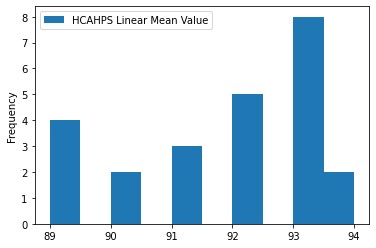

In [22]:
#CHECK THE NORMAL DISTRUBUTIONS 
df_checknorm = Data2018_filtered2 ['HCAHPS Linear Mean Value']
df_checknorm2 = df_checknorm.append(Data2019_filtered2 ['HCAHPS Linear Mean Value'])
df_checknorm3 = df_checknorm2.append(Data2020_filtered2 ['HCAHPS Linear Mean Value'])
df_checknorm4 = df_checknorm3.append(Data2021_filtered2 ['HCAHPS Linear Mean Value'])
df_checknorm5 = df_checknorm4.append(Data2022_filtered2 ['HCAHPS Linear Mean Value'])
df_checknorm6 = df_checknorm5.append(Data2023_filtered2 ['HCAHPS Linear Mean Value'])
df_checknorm6

df_checknorm7 = pd.DataFrame(df_checknorm6)
df_checknorm7[['HCAHPS Linear Mean Value']].plot.hist()

In [23]:
##Step 14: Determine AVG & STD for US Hospitals
#Average per time period 

avg2018 = df1_all['Statis2018'].mean()
avg2019 = df1_all['Statis2019'].mean()
avg2020 = df1_all['Statis2020'].mean()
avg2021 = df1_all['Statis2021'].mean()
avg2022 = df1_all['Statis2022'].mean()
avg2023 = df1_all['Statis2023'].mean()


print(avg2018)
print(avg2019)
print(avg2020)
print(avg2021)
print(avg2022)
print(avg2023)

92.0
92.25
92.25
91.75
91.0
91.0


In [24]:
##Step 15: Count of us hospitals
n_2018=int(df1_all['Statis2018'].count())
n_2019=int(df1_all['Statis2019'].count())
n_2020=int(df1_all['Statis2020'].count())
n_2021=int(df1_all['Statis2021'].count())
n_2022=int(df1_all['Statis2022'].count())
n_2023=int(df1_all['Statis2023'].count())

print(n_2018)
print(n_2019)
print(n_2020)
print(n_2021)
print(n_2022)
print(n_2023)

4
4
4
4
4
4


In [25]:
#Standard Deviation of each Timeperiod

std2018 = stdall/(math.sqrt(n_2018))
std2019 = stdall/(math.sqrt(n_2019))
std2020 = stdall/(math.sqrt(n_2020))
std2021 = stdall/(math.sqrt(n_2021))
std2022 = stdall/(math.sqrt(n_2022))
std2023 = stdall/(math.sqrt(n_2023))

print (std2018)
print (std2019)
print (std2020)
print (std2021)
print (std2022)
print (std2023)

0.8139966705768182
0.8139966705768182
0.8139966705768182
0.8139966705768182
0.8139966705768182
0.8139966705768182


In [26]:
zstat = 1.96

In [27]:
##Step 16: Create data frame
#Create data frame
df3 = [['2018',avgsatis_JH_2018 ,avg2018,std2018,avgall,zstat],
       ['2019',avgsatis_JH_2019 ,avg2019,std2019,avgall,zstat],
       ['2020',avgsatis_JH_2020 ,avg2020,std2020,avgall,zstat],
       ['2021',avgsatis_JH_2021 ,avg2021,std2021,avgall,zstat],
       ['2022',avgsatis_JH_2022 ,avg2022,std2022,avgall,zstat],
       ['2023',avgsatis_JH_2023 ,avg2023,std2023,avgall,zstat]]
df3

[['2018', 92.0, 92.0, 0.8139966705768182, 91.70833333333333, 1.96],
 ['2019', 93.0, 92.25, 0.8139966705768182, 91.70833333333333, 1.96],
 ['2020', 93.0, 92.25, 0.8139966705768182, 91.70833333333333, 1.96],
 ['2021', 92.0, 91.75, 0.8139966705768182, 91.70833333333333, 1.96],
 ['2022', 93.0, 91.0, 0.8139966705768182, 91.70833333333333, 1.96],
 ['2023', 93.0, 91.0, 0.8139966705768182, 91.70833333333333, 1.96]]

In [28]:
##Step 17: Add column names
#Add column names to df3

df4 = pd.DataFrame(df3,columns = ['Year','JOHNS HOPKINS HOSPITAL', 'Avg Satisfaction US Hosp', 
                                  'stdPerTime', 'Avg Satisfaction All' ,'zstat'])
df4

,Year,JOHNS HOPKINS HOSPITAL,Avg Satisfaction US Hosp,stdPerTime,Avg Satisfaction All,zstat
0,2018,92.0,92.00,0.813997,91.708333,1.96
1,2019,93.0,92.25,0.813997,91.708333,1.96
2,2020,93.0,92.25,0.813997,91.708333,1.96
3,2021,92.0,91.75,0.813997,91.708333,1.96
4,2022,93.0,91.00,0.813997,91.708333,1.96
5,2023,93.0,91.00,0.813997,91.708333,1.96


In [29]:
##Step 18: UCL & LCL calculations

#UCL & LCL calculations

df4['UCL for US Hospitals']=df4['Avg Satisfaction All']+df4['zstat']*df4['stdPerTime']
df4['lCL for US Hospitals']=df4['Avg Satisfaction All']-df4['zstat']*df4['stdPerTime']

df4

,Year,JOHNS HOPKINS HOSPITAL,Avg Satisfaction US Hosp,stdPerTime,Avg Satisfaction All,zstat,UCL for US Hospitals,lCL for US Hospitals
0,2018,92.0,92.00,0.813997,91.708333,1.96,93.303767,90.1129
1,2019,93.0,92.25,0.813997,91.708333,1.96,93.303767,90.1129
2,2020,93.0,92.25,0.813997,91.708333,1.96,93.303767,90.1129
3,2021,92.0,91.75,0.813997,91.708333,1.96,93.303767,90.1129
4,2022,93.0,91.00,0.813997,91.708333,1.96,93.303767,90.1129
5,2023,93.0,91.00,0.813997,91.708333,1.96,93.303767,90.1129


Text(0, 0.5, 'overall Satisfaction')

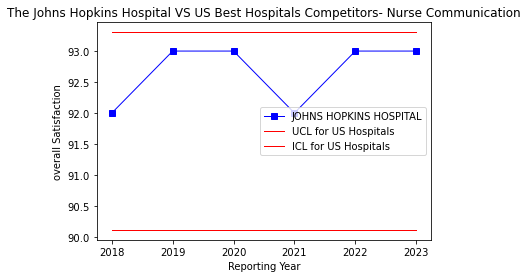

In [33]:
##Step 19: Plot X-bar Control Chart
plt.plot('Year','JOHNS HOPKINS HOSPITAL', data = df4, marker ='s' ,markerfacecolor = 'blue' , linewidth=1 ,color='blue')
plt.plot('Year','UCL for US Hospitals' ,data = df4, markersize = 0 , color = 'red' , linewidth=1)
plt.plot('Year','lCL for US Hospitals',data = df4, markersize = 0 , color = 'red' , linewidth=1)
plt.legend()
plt.title ('The Johns Hopkins Hospital VS US Best Hospitals Competitors- Nurse Communication')
plt.xlabel ('Reporting Year')
plt.ylabel ('overall Satisfaction')